In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
dlc_output = pd.read_hdf('/Volumes/My_Passport/dlc_analysis/behavcamvideos/GRIN033_H14_M34_S32_01162020/dlc_output/behavCam05DLC_resnet50_Open_Field_v2Jan27shuffle1_150000.h5')

In [10]:
dlc_output.head()

scorer    DLC_resnet50_Open_Field_v2Jan27shuffle1_150000             \
bodyparts                                       ear_left              
coords                                                 x          y   
0                                             182.459595  64.162971   
1                                             182.253250  63.902737   
2                                             183.161713  63.787975   
3                                             183.351120  64.231689   
4                                             183.500870  64.538139   

scorer                                                                         \
bodyparts              ear_right                         tail_base              
coords    likelihood           x          y likelihood           x          y   
0                1.0  175.690704  81.688751        1.0  135.587189  65.170486   
1                1.0  175.381180  81.466217        1.0  135.700241  64.774269   
2                1.0  175.693863  81.727692        1.0  135.493988  64.869102   
3                1.0  175.139145  81.894554        1.0  135.557678  64.775795   
4                1.0  174.939819  82.099571        1.0  135.829498  64.716202   

scorer                                                      
bodyparts            miniscope_light                        
coords    likelihood               x          y likelihood  
0                1.0      202.043701  78.638710        1.0  
1                1.0      202.721512  78.175308        1.0  
2                1.0      203.261276  78.705528        1.0  
3                1.0      204.286987  80.260117        1.0  
4                1.0      204.174301  80.721535        1.0

In [5]:
#dlc_output.diff()

In [14]:
df_columns = list(dlc_output.columns)

In [15]:
coordinates_delta_df = pd.concat([dlc_output[df_columns[0][0]][body_part][['x', 'y']] for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))]))], 
          keys=list(set([df_columns[item][1] for item in range(len(df_columns))])), axis=1).diff()

In [16]:
coordinates_delta_df.head()

tail_base           ear_right           miniscope_light            \
coords         x         y         x         y               x         y   
0            NaN       NaN       NaN       NaN             NaN       NaN   
1       0.113052 -0.396217 -0.309525 -0.222534        0.677811 -0.463402   
2      -0.206253  0.094833  0.312683  0.261475        0.539764  0.530220   
3       0.063690 -0.093307 -0.554718  0.166862        1.025711  1.554588   
4       0.271820 -0.059593 -0.199326  0.205017       -0.112686  0.461418   

        ear_left            
coords         x         y  
0            NaN       NaN  
1      -0.206345 -0.260235  
2       0.908463 -0.114761  
3       0.189407  0.443714  
4       0.149750  0.306450

In [18]:
def velocity(x_diff, y_diff):
    v_t = math.sqrt(x_diff**2+y_diff**2)
    return(v_t)

In [35]:
velocity(coordinates_delta_df['miniscope_light']['x'].values[4], coordinates_delta_df['miniscope_light']['y'].values[4])

0.474978821519661

In [37]:
velocity_df = pd.DataFrame(np.transpose(np.array([np.array([velocity(coordinates_delta_df[body_part]['x'].values[frame],coordinates_delta_df[body_part]['y'].values[frame]) for frame in range(len(coordinates_delta_df))]) for body_part in list(set([df_columns[item][1] for item in range(len(df_columns))]))])),
             columns=list(set([df_columns[item][1] for item in range(len(df_columns))]))) 

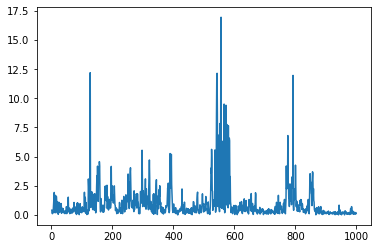

In [42]:
plt.plot(velocity_df['tail_base'])
plt.show()

In [7]:
print(df_columns[0][1])
dlc_output[df_columns[0][0]][df_columns[0][1]]

ear_left


coords,x,y,likelihood
0,182.459595,64.162971,1.0
1,182.253250,63.902737,1.0
2,183.161713,63.787975,1.0
3,183.351120,64.231689,1.0
4,183.500870,64.538139,1.0
5,184.274597,65.008217,1.0
6,184.907181,64.904823,1.0
7,185.834366,64.617752,1.0
8,186.967407,64.249023,1.0
9,187.870117,63.711727,1.0


In [27]:
#create body part delta data frame 
body_part_deltas = []
for body_part in range:    
    body_part_delta = [dlc_output.iloc[frame+1,1]-dlc_output.iloc[frame,1] for frame in range (0, 999)]

TypeError: 'type' object is not iterable